# NBA Data Exploration

Datasets Used can be found at the URLs below:

Players: https://raw.githubusercontent.com/MrEarley/PortfolioProjects/main/player_data.csv

Stats: https://raw.githubusercontent.com/MrEarley/PortfolioProjects/main/Seasons_Stats.csv

Originally Found on this Kaggle site: https://www.kaggle.com/datasets/drgilermo/nba-players-stats?resource=download&select=player_data.csv

## Step 1: Finding the Dataset

I am fascinated by music, especially hip hop music so I thought about exploring how the genre has changed over the years. I also currently work in homeless services and thought about exploring data about this topic. Finally, sports are a huge part of my life and I seek to work in sports analytics after I finish this program. I explored datasets surrounding all three of these topics and found (and saved) some great resources, sparking even more curiosity and questions about these topics. This may have been the most fruitful portion of this project for me as I got to know several new routes to find quality data. In the end I decided to work with a captivating dataset regarding the National Basketball League that I just could not get enough of. 

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import sklearn.metrics
import sklearn.linear_model
import os

In [165]:
players = pd.read_csv("https://raw.githubusercontent.com/MrEarley/PortfolioProjects/main/player_data.csv")
stats = pd.read_csv("https://raw.githubusercontent.com/MrEarley/PortfolioProjects/main/Seasons_Stats.csv")

# Step 2: Explore the Datasets

### Preliminary Exploration

I will be working with two different dataframes for this project. The first contains information about current and former NBA players. Let's take a look!

In [4]:
players

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",NaN
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",NaN


High Level View: It looks like there are 4550 rows and 8 different columns. It seems as if the players are sorted alphabetically by their last name, this is something we can look more into. We have some basic information such as when they played, their measurements, and where they went to college. All these lead us to ask unique questions we can answer using data later on. 

In [5]:
players.shape

(4550, 8)

In [6]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4549 non-null   object 
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


Here we confirm the shape of the dataframe and see the specifics of the information included. We see that we have a few different data types, including objects, integers, and floats. 

In [7]:
players.head(5)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [8]:
players.describe()

,year_start,year_end,weight
count,4550.000000,4550.000000,4544.000000
mean,1985.076264,1989.272527,208.908011
std,20.974188,21.874761,26.268662
min,1947.000000,1947.000000,114.000000
25%,1969.000000,1973.000000,190.000000
50%,1986.000000,1992.000000,210.000000
75%,2003.000000,2009.000000,225.000000
max,2018.000000,2018.000000,360.000000


These two commands help us understand our data even better. We again see the first 5 players in the dataframe. We also see that the mean weight is around 209 pounds (source data says height is in feet/inches and weight is in pounds). Already, we notice that the maximum weight is over three times that of the minimum weight. This could be a possible area we can explore more. 

In [9]:
categorical = players.dtypes[players.dtypes == 'object'].index
print(categorical)

players[categorical].describe()

Index(['name', 'position', 'height', 'birth_date', 'college'], dtype='object')


,name,position,height,birth_date,college
count,4550,4549,4549,4519,4248
unique,4500,7,28,4161,473
top,George Johnson,G,6-7,"October 25, 1948",University of Kentucky
freq,3,1574,473,3,99


By highlighting the categorical data we get furter insight into these variables. We see that 6-7 is the most common height and G (Guard is the most common position). This lead us to further questions we can explore down the road.

In [10]:
players.isnull().sum()

name            0
year_start      0
year_end        0
position        1
height          1
weight          6
birth_date     31
college       302
dtype: int64

We explore the cleanliness of our data with this call that spotlights the nul values in our dataframe. We see that many values are missing from "birth_date" and "college" columns. Is this because they didn't go to college, or because their birth dates weren't recorded? We hope to find out.  

This preliminary exploration has given us a pretty good sense of what our first dataset, "players" includes. We already have some questions we are interested in moving forward.

Let's take a look at our second and final dataset, "stats". 

In [11]:
stats

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [12]:
stats.shape

(24691, 53)

In [13]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

As we begin exploring this second data set, we see it is a bit larger than the first. Stats has 24,691 rows and 53 columns. These columns have mostly float data types, which makes sense as they represent basketball statistics, but also has one integer datatype and three objects. 

In [14]:
stats.head(5)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [15]:
stats.describe()

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24691.000000,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,...,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
mean,12345.000000,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,...,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,7127.822084,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,...,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,0.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6172.500000,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,...,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,12345.000000,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,...,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,18517.500000,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,...,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000
max,24690.000000,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000


Here the head and describe commands tell us a lot. We get a glimpse into the stats for the first 5 players. We also see a breakdown of the stats mean, standard deviation, minimum, and other summary statistics. 

In [16]:
categorical = stats.dtypes[stats.dtypes == 'object'].index
print(categorical)

stats[categorical].describe()

Index(['Player', 'Pos', 'Tm'], dtype='object')


,Player,Pos,Tm
count,24624,24624,24624
unique,3921,23,69
top,Eddie Johnson,PF,TOT
freq,33,4966,2123


In [17]:
stats.isnull().sum()

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


Getting a glimpse of just the categorical or object data types, we already are gaining questions. There are 23 unique positions with Power Forward (PF) being the most common. Eddie Johnson is the most common player, did he appear 33 times? Or are there a few different players by the same name? Let's explore!

We also see that there are A LOT of null values in our dataset. We saw this right away just from looking at the top 5 rows. This is likely because the NBA didn't start tracking more advanced stats until relatively recently. Additionally, the three point line wasn't introduced to the NBA until 1979, so it makes sense that anything before that would have a null value for 3P% (three point percentage). 

We also notice here that there are three columns that are either essentially completely blank and contain all null values, or contain no useful information ("blanl", "blank2", "Unnamed: 0"). One way we can clean our data is to drop these from the data frame, let's do that. 

In [166]:
stats = stats.drop(columns=["blanl", "blank2", "Unnamed: 0"])
stats

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


### Visual Exploration

Checking out the data specifics above was crucial to having a base understanding of our data. To push our knowledge and curiosity even further, let's explore through a more visual lense. We see to discern how the data are distributed, spot some common trends, and begin exploring the relationships between our variables. 

array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

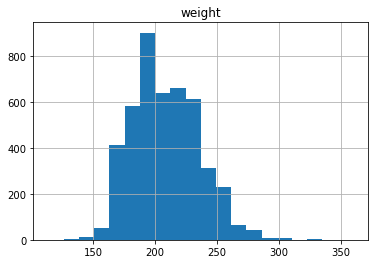

In [18]:
players.hist(column="weight",bins=20)

Text(0.5, 1.0, 'Year vs Weight')

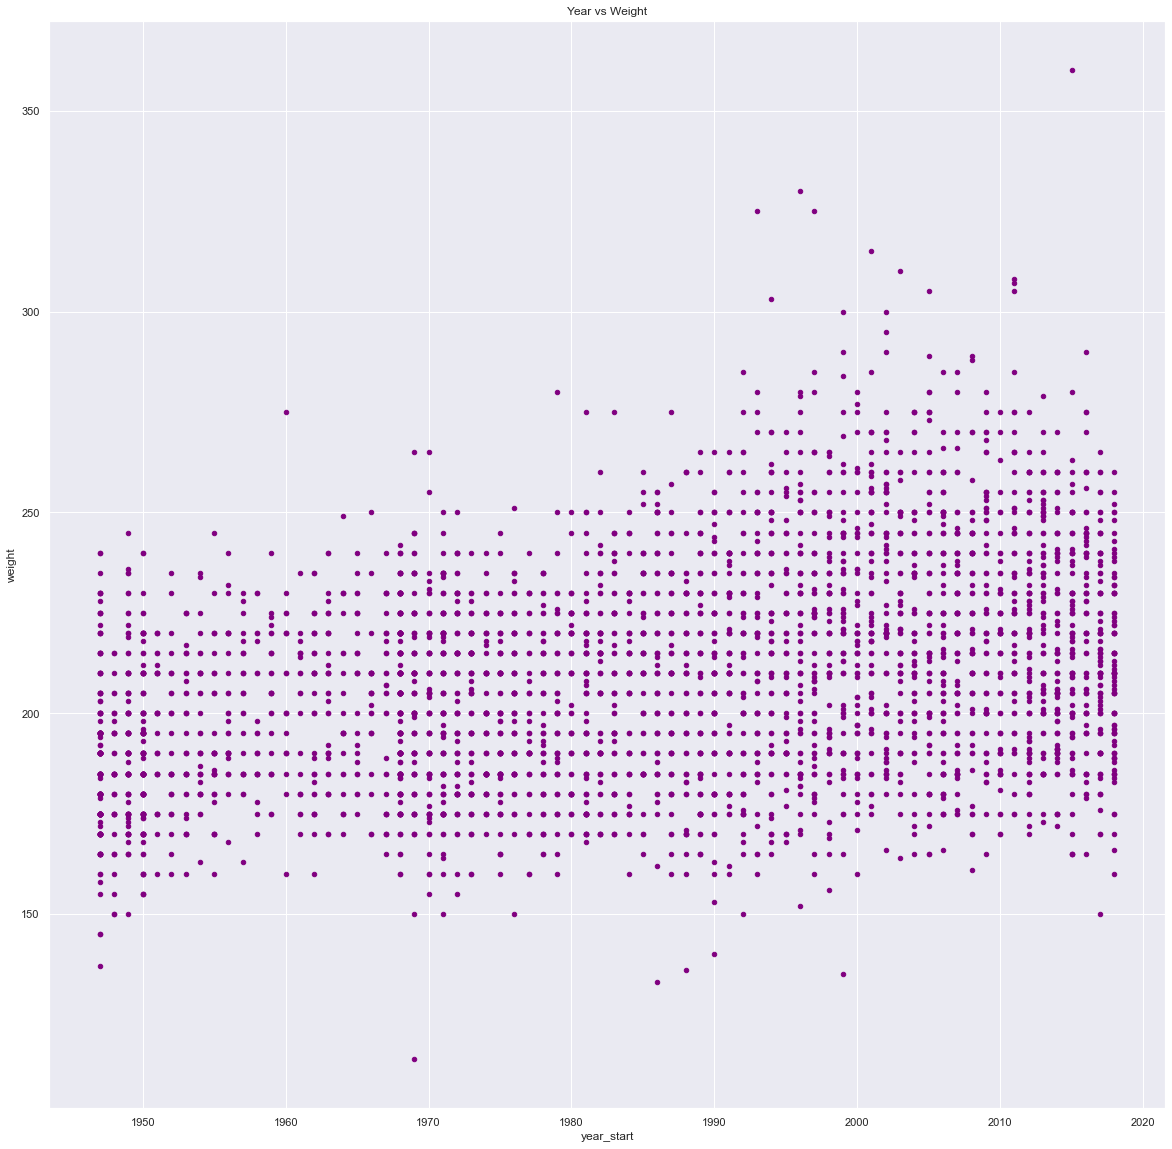

In [151]:
ax1 = players.plot.scatter(x="year_start", y="weight",c="Purple")
plt.title("Year vs Weight")

Getting a little visual of our players dataframe is helpful. We see a scatterplot of the weights and notice that they seem to be centered about 200 pounds. We also see in the scatterplot of year_start vs. weight that weight doesn't change too much as time goes on, but seems to go up a bit. 

Let's take a look at some visuals from our other dataframe. 

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

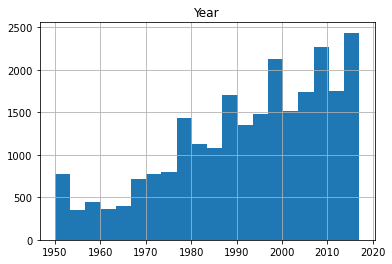

In [23]:
stats.hist(column="Year",bins=20)

[Text(0.5, 1.0, 'Count of NBA Teams')]

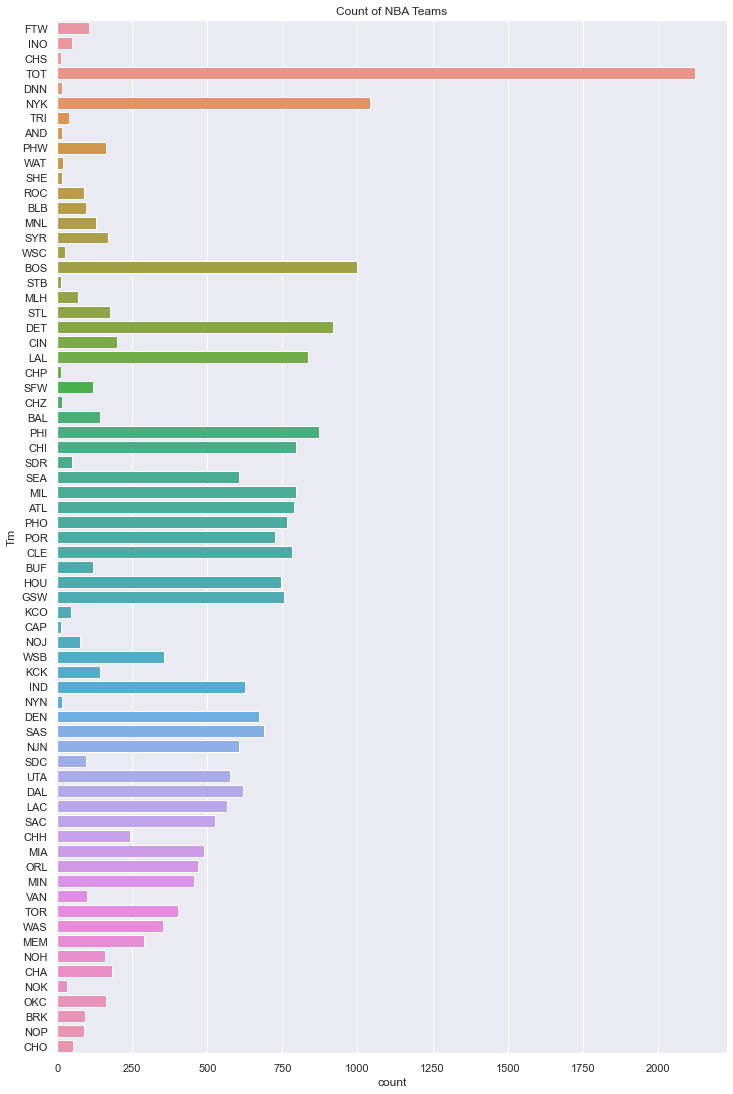

In [152]:
sns.set(rc={'figure.figsize':(12,19)})

sns.countplot(data=stats, y="Tm").set(title="Count of NBA Teams")

Text(0.5, 1.0, 'Year vs Points Scored')

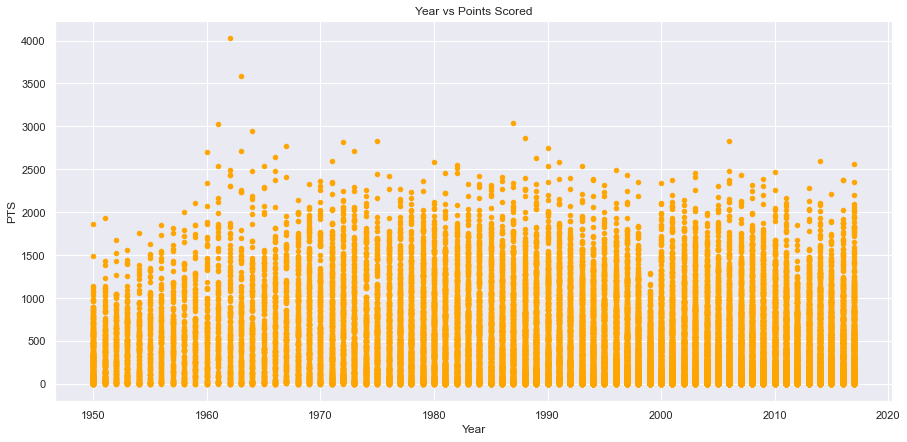

In [164]:
ax2 = stats.plot.scatter(x="Year", y="PTS",c="Orange")
plt.title("Year vs Points Scored")

<AxesSubplot:>

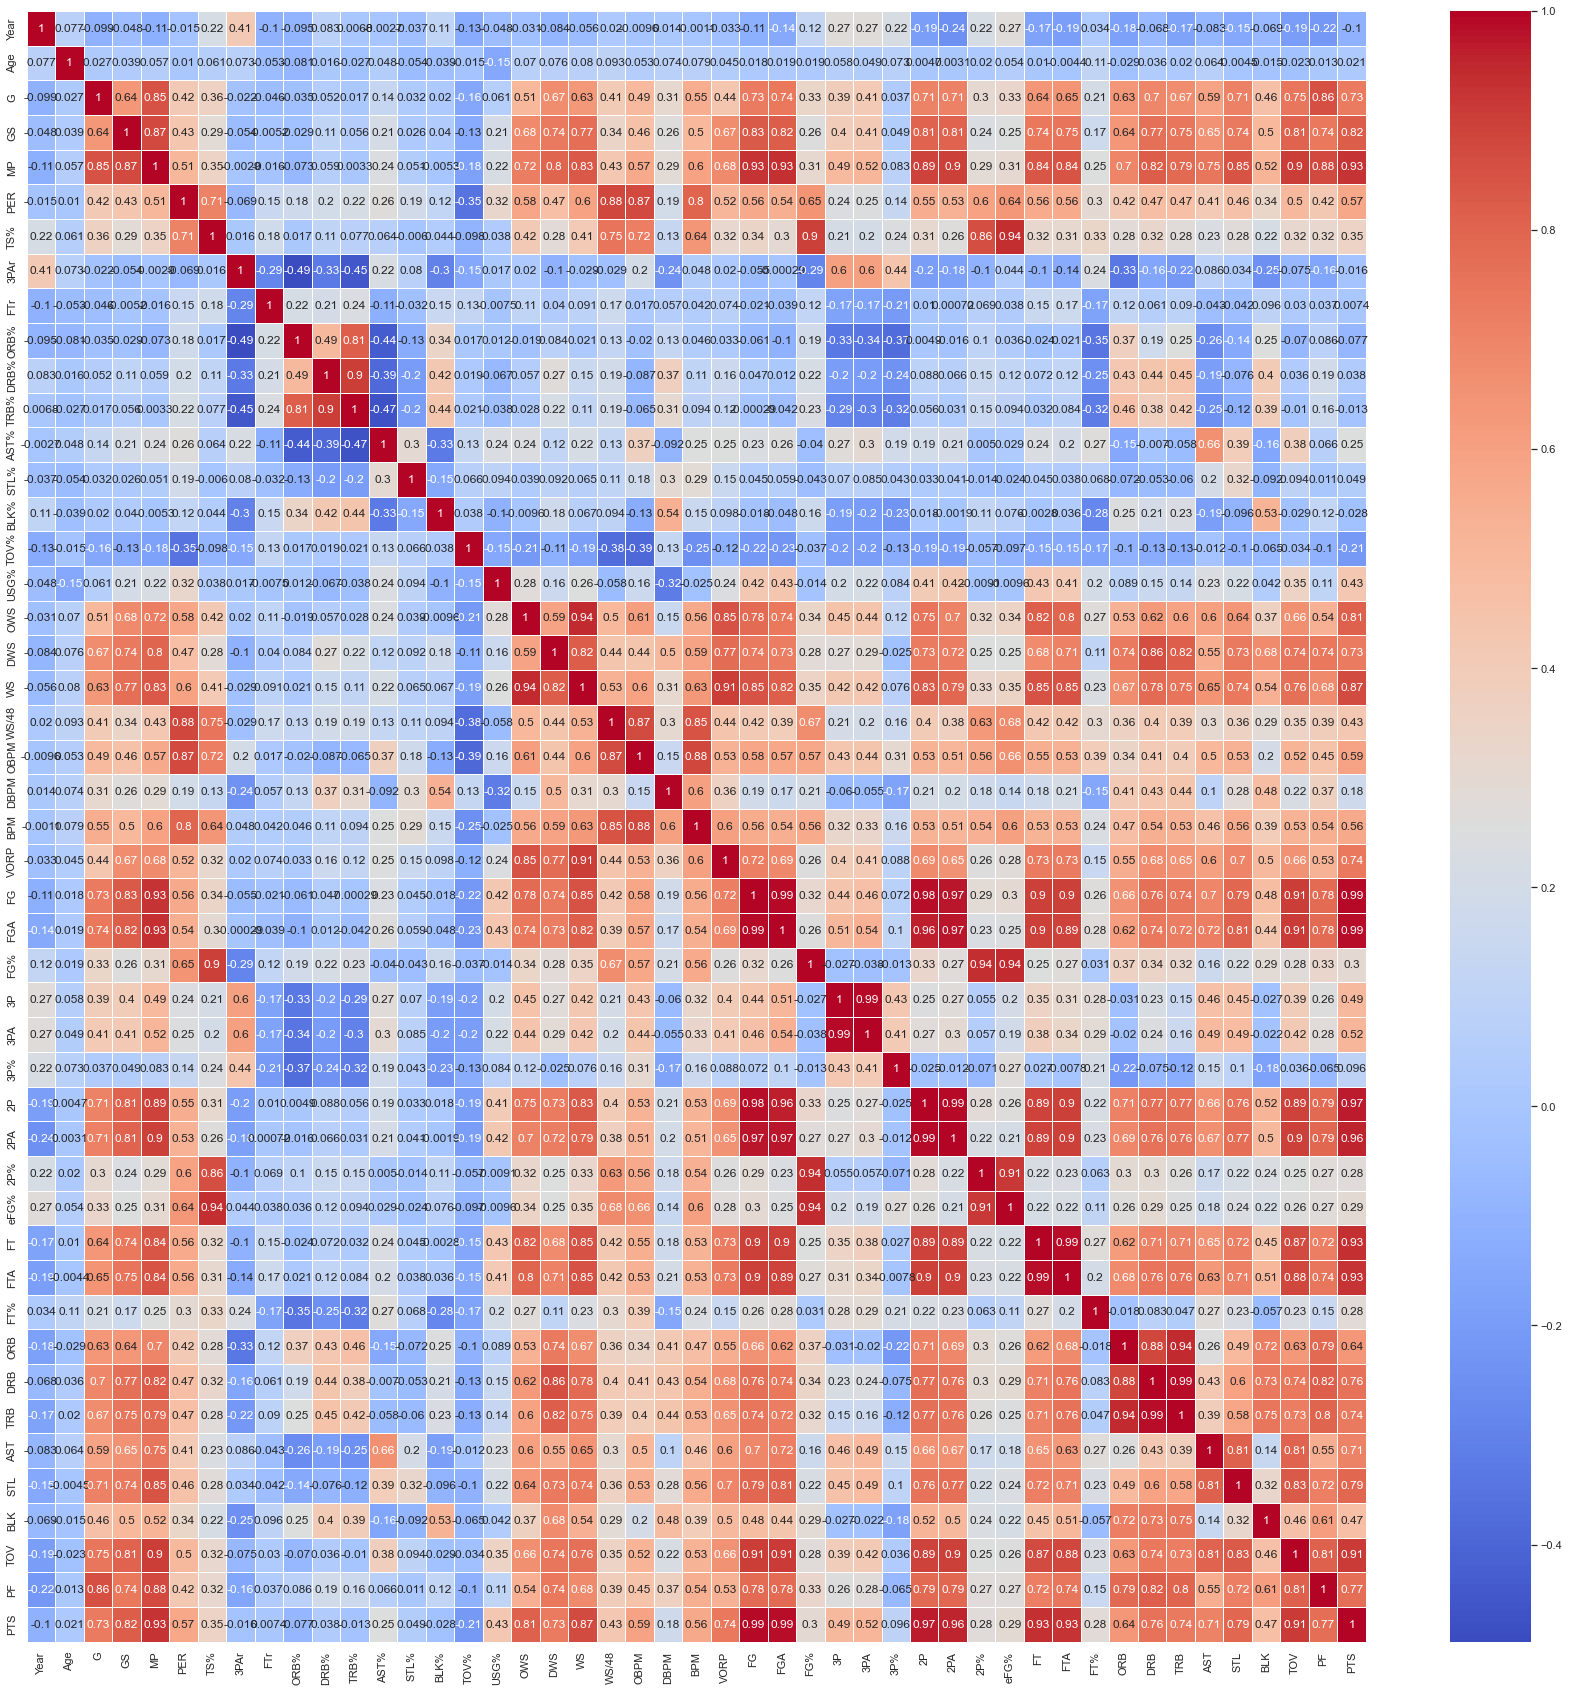

In [77]:
corr_matrix = stats.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, linewidth=.5, cmap="coolwarm")

This correlation matrix helps us see what variables are most correlated, both positively and negatively.

These visuals help us out quite a bit in understanding and guiding our exploration. We see in the first, a histogram of the years included in the data frame. We see that as time goes on, the number of rows from that year seem to increase. This could be because the nba has expanded over time including more players, or for other reasons. We also see a countplot (essentially a bar chart) all the different teams represented. This could be an interesting way of exploring our data as we see some teams are much better represented. The last scatter plot of the number of points scored by a player based on the year really doesn't show us much. 

# Step 3: Identify Research Questions and Perform Analysis

### Question #1

The first research question I will be diving into is whether or not there is a connection between a player's position and the statistical categories they excel in. Specifically whether certain positions are likely to record more assists (when you pass to a teammate and they score), points (when you score), and rebounds (when someone misses a shot and you get the ball). 

In basketball there are 3 main positions. The guards are typically the smaller players who dribble more and I would guess are more likely to have assists. There are forwards who may be more offensively minded and may have the most points. Finally, there are centers who are the tallest usually and most often will get a lot of rebounds. Many players play multiple positions and will be listed under their top ones in this data set. 

Let's first take a look at a barchart of the player's positions and the amount of points they score. 

[Text(0.5, 1.0, 'Points Scored by Position')]

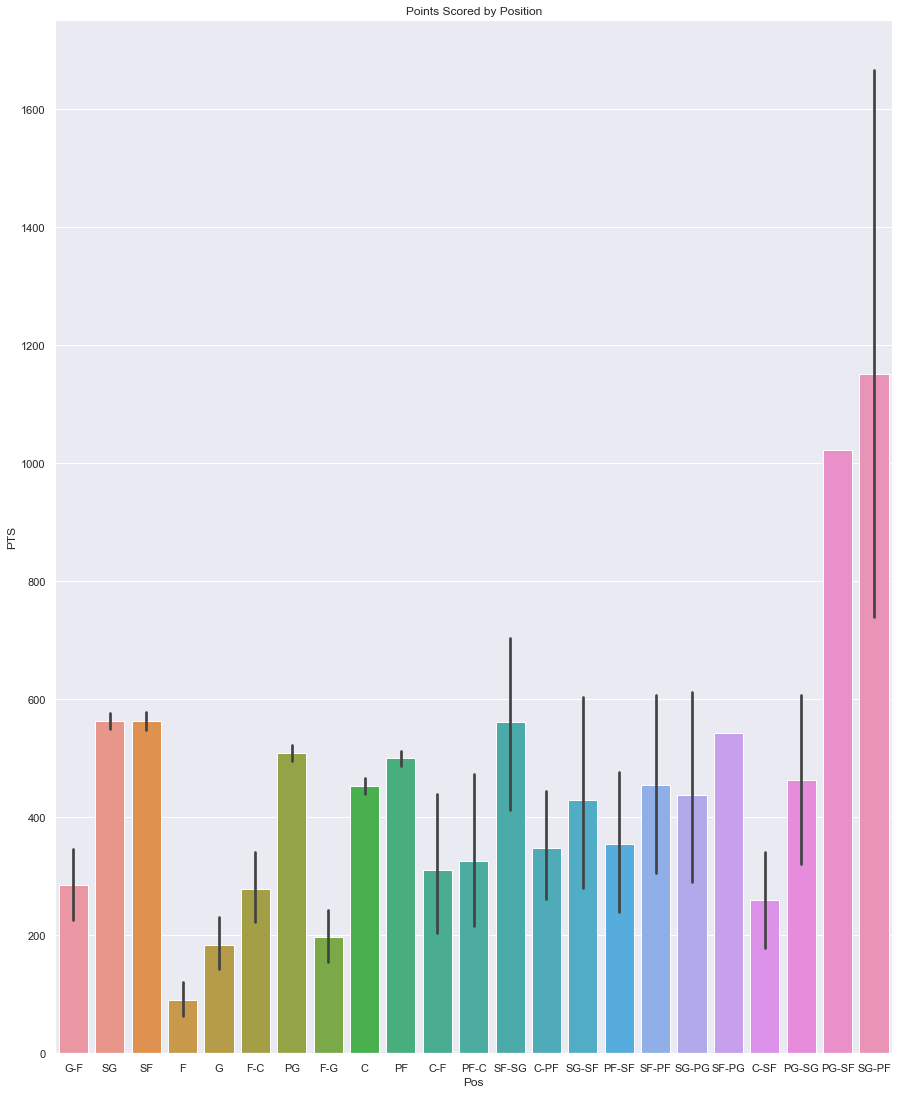

In [154]:
sns.set(rc={'figure.figsize':(15,19)})

sns.barplot(data=stats, x="Pos", y="PTS").set(title="Points Scored by Position")

This graph is actually very illuminating and pulls out some important insights I hadn't expected. Here is a key representing the shorthand for each position.

G - Guard, SG - Shooting Guard, SF - Small Forward, F - Forward, C - Center, PF - Power Forward

1. It seems as if it pays to be able to play multiple positions. A lot of the top point scorers are listed at multiple positions (SG-PF, PG-SF, SF-SG). 

2. Specifically is someone can play as both a guard (have the ball a lot), and a forward (be focused on scoring), they can get a lot of points. 

3. Players who are one dimensional and only play one position tend to have a hard time scoring a lot of points. This has led to something in the NBA today we call "positionless basketball", where players should be able to play any position if they want to succeed. 

Let's now take a look at assists. 

[Text(0.5, 1.0, 'Assists Made by Position')]

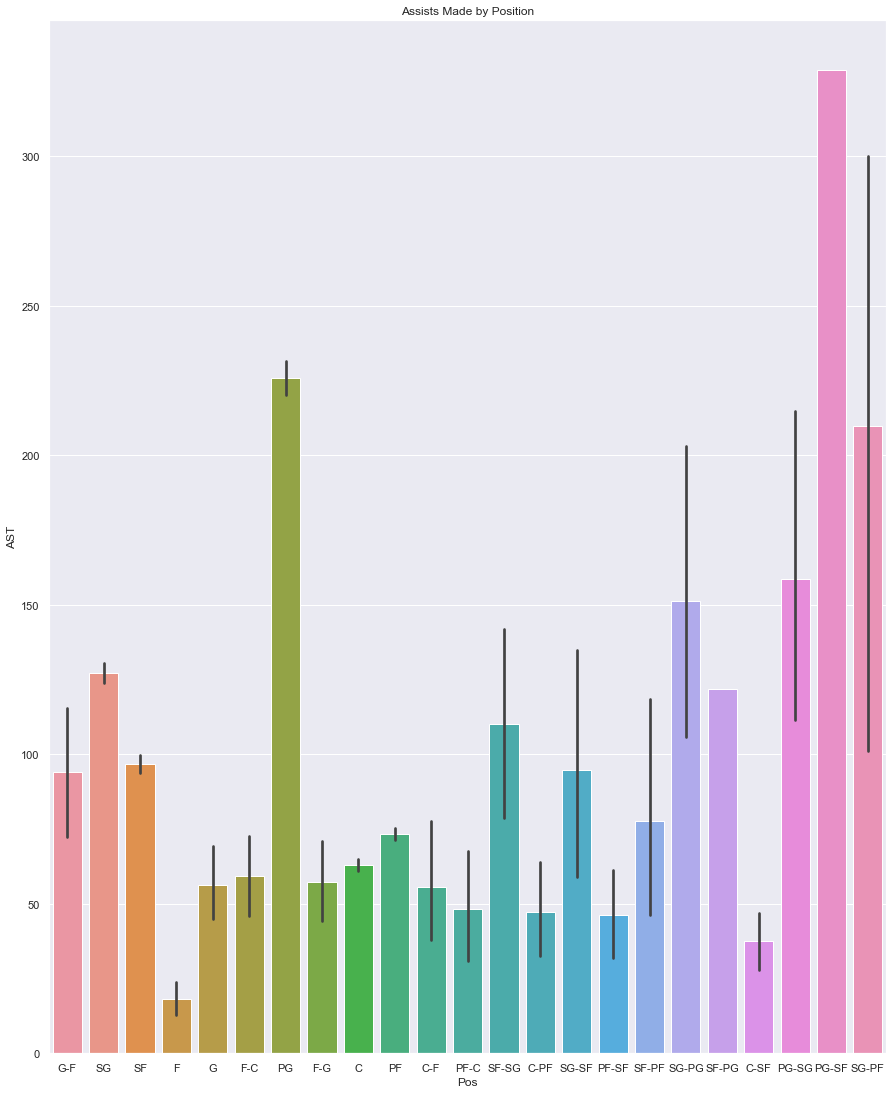

In [155]:
sns.set(rc={'figure.figsize':(15,19)})

sns.barplot(data=stats, x="Pos", y="AST").set(title="Assists Made by Position")

This graph is incredibly illuminating for us. We see that the players who have the most assists are PG (point guards), PG-SF (point guards/small forwards), and SG-PF (shooting guards/power forward). This makes sense as the guard have the ball the most so they can make passes to get their teammates baskets. This really helps us answer our original research question as it is obvious that guards and forwards, particularly point guards, tend to have the most assists. 

[Text(0.5, 1.0, 'Rebounds by Position')]

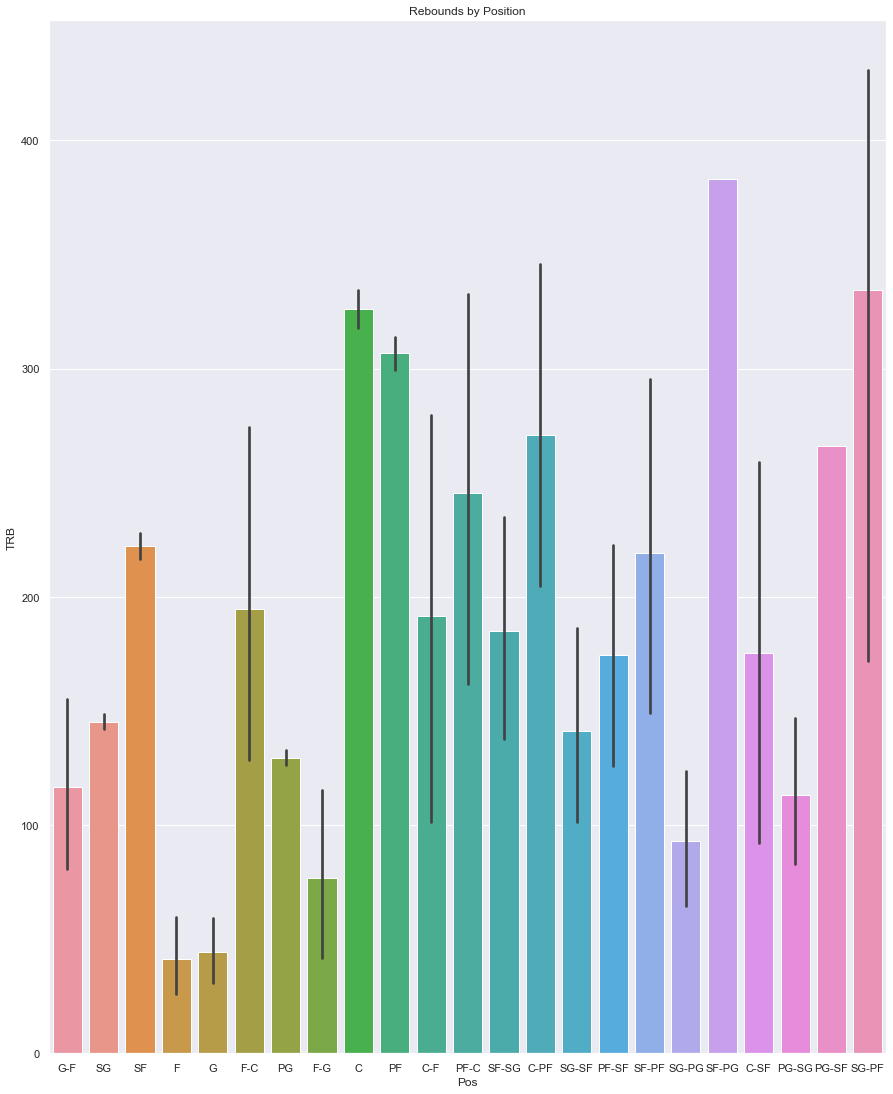

In [156]:
sns.set(rc={'figure.figsize':(15,19)})

sns.barplot(data=stats, x="Pos", y="TRB").set(title="Rebounds by Position")

This final graph for our first research question really wraps things up for us. We see that the players that get the most rebounds are typically C (center), PG-SF (point guard/small forward), and SG-PF (shooting guard/power forward). This is actually a bit of a surprise. We would expect the centers to get the most rebounds as they are typically the tallest guys on a team and are closest to the basket. However, here we have guards and forwards getting a lot of rebounds which is a bit of a surprise. 

Conclusion: Overall, the answer to our first research question is that yes, the position a player has does have an impact on what statistical categories they shine most in. Smaller players such as guards and small forwards, tend to have a lot of assists, shooting guards and forwards tend to score a lot of points, and centers get a lot of rebounds. Our biggest takeaway was that for rebounds, it is a team effort. It is not just for the tall guys to get rebounds as guards and forwards did better in this category than expected. As with any analysis, we do have limitations. We have a good amount of data but not every player that has ever played. Gaining a robust data set may help us determine our results with even more accuracy.

### Question #2

The second research question I will be exploring through this analysis is what factors contribute to a player scoring a lot of points. Are there some that cause him to be an elite scorer? Let's dig into this question using our data!

One would typically think that if a player shoots more shots, he is more likely to score a lot of points. Let's see if when a player's field goals (FG in the data frame, represents the amount of shots the player takes) is correlated with his points.

[Text(0.5, 1.0, 'Points vs Field Goals')]

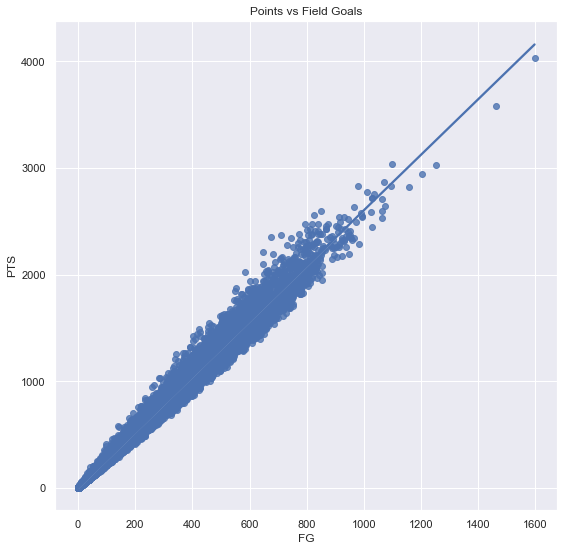

In [157]:
sns.set(rc={'figure.figsize':(9,9)})
sns.regplot(data=stats, x="FG", y="PTS").set(title="Points vs Field Goals")

We see here a very close connection that tells us as the player shoots more shots (FG on the x axis), they tend to score more points. We also know from our correlation matrix earlier that the R value is 0.99. This tells us that a player needs to make sure to take a good amount of shots in order to be someone who the team relies on to score a good amount of points. 

A good way to figure out what helps players score a lot of points is to eliminate the things that slow them down from scoring. Let's look into a statistic that might limit players' ability to score points, turnovers. A turnover happens when a player loses the ball and gives it to the other team. This is bad for the player's team and something players try to avoid. Let's see if there is a connection between the percentage of time a player turns the ball over (TOV% in our dataframe) and the amount of points he scores. 

[Text(0.5, 1.0, 'Points vs Turnover Percentage')]

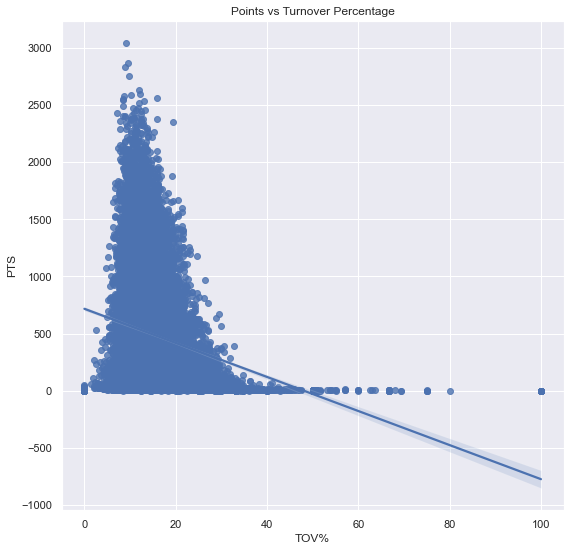

In [158]:
sns.set(rc={'figure.figsize':(9,9)})
sns.regplot(data=stats, x="TOV%", y="PTS").set(title="Points vs Turnover Percentage")

This graph is quite different than what I had expected. While we do see a negative correlation, meaning that as a player turns the ball over more, he scores less points. The data is skew right and very clumped on the lower side of the x axis. We can conclude however that when a player holds on to the ball more frequently and thus doesn't turn it over, he will have more opportunities to score.

For the final part of our analysis here we can look use box plots. It will be interesting to see if some positions are able to score more than others. We looked at this a bit in our first question, but the box plots will provided an enhanced view of the impact a position has on a player's ability to score. 

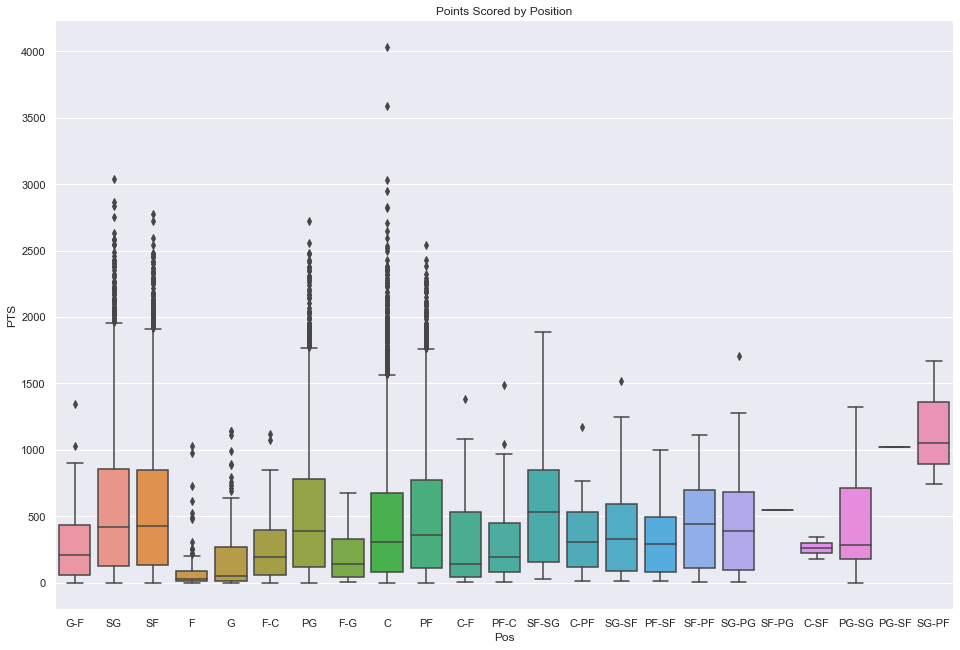

In [159]:
sns.set(rc={'figure.figsize':(20,20)})
sns.catplot(data=stats, x="Pos", y="PTS", kind="box", height=9, aspect=1.5).set(title="Points Scored by Position")

We see from this plot that SG-PF (Shooting guard/power forward) are the main outliers in terms of scoring a lot of points. There have a median well above the rest and seem to be real scoring threats. The only other position that stands out a bit with the second highest median is SF-SG (small forward/shooting guard). This tells us that if you want to be someone who scores a lot of points in the NBA, it's best to focus on your position being a shooting guard or a forward. 

### Conclusion

Our second research question was "What factors contribute to a player scoring a lot of points?". Through our analysis we found out that if a player has the opportunity to take a lot of shots, turn the ball over to the other team a small number of times, and plays as a shooting guard or forward, they are likely going to be someone who puts the ball in the basket often. We now can provide data to tell future athletes how to play the best game to get recruited to a top notch school. Let's see in question 3 what schools might be a good choice to attend. In terms of limitations we do have some here. Of course there are a ton of factors that go into how many points a player score. Who their coach is, how good the defense they are playing, and whether or not they are dealing with an injuray just to name a few.

### Question #3 

The third question I would like to explore comes from our "Players" dataframe. A big decision in anyone's life is where they will attend college. This choice is especially heavy for an aspiring professional athlete as it can make or break their future career. My second research question is does the college a player attends have an impact on their performance in the NBA?

For this task we are going to need the combined strength of both of our dataframes. Our current dataframe "Players" has the origin data for many of our players, including where they went to college. Our dataframe "stats" has all their statistical information. We are going to do a merge between them on the name column to get the two together. First we need to change the "name" column in "Players" to match "Player" in "stats".

In [105]:
updatedplayers = players.rename(columns={"name": "Player"})
updatedplayers.head(5)

,Player,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [107]:
total = pd.merge(stats.reset_index(), updatedplayers.reset_index(), on=["Player"])
total

,index_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,PF,PTS,index_y,year_start,year_end,position,height,weight,birth_date,college
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,217.0,458.0,126,1949,1951,G-F,5-11,170.0,"November 1, 1918",Indiana University
1,314,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,...,97.0,202.0,126,1949,1951,G-F,5-11,170.0,"November 1, 1918",Indiana University
2,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,99.0,279.0,195,1950,1952,G,6-2,185.0,"January 15, 1921",University of Kentucky
3,315,1951.0,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,...,98.0,152.0,195,1950,1952,G,6-2,185.0,"January 15, 1921",University of Kentucky
4,489,1952.0,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,...,56.0,126.0,195,1950,1952,G,6-2,185.0,"January 15, 1921",University of Kentucky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23463,24674,2017.0,Troy Williams,SF,22.0,HOU,6.0,3.0,139.0,12.8,...,18.0,58.0,4419,2017,2018,F,6-7,218.0,"December 30, 1994",Indiana University
23464,24675,2017.0,Kyle Wiltjer,PF,24.0,HOU,14.0,0.0,44.0,6.7,...,4.0,13.0,4446,2017,2017,F,6-10,240.0,"October 20, 1992",Gonzaga University
23465,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,17.0,23.0,4543,2017,2017,C,7-0,240.0,"September 9, 1996","University of Nevada, Las Vegas"
23466,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,78.0,240.0,4544,2017,2018,G-F,6-8,215.0,"February 18, 1994",NaN


Alright, now that we have our dataframe ready, let's get a sense what different colleges we are dealing with. In order to do this we can explore what the 10 most common colleges are for NBA players in our data set are. 

In [110]:
topcolleges = players['college'].value_counts()[:10].index.tolist()
topcolleges

['University of Kentucky',
 'University of California, Los Angeles',
 'University of North Carolina',
 'University of Kansas',
 'Duke University',
 'Indiana University',
 'University of Notre Dame',
 'University of Louisville',
 "St. John's University",
 'University of Arizona']

Above we have our list of the ten most commonly attended universities for NBA players. These colleges make players into elite athletes who succeed at the highest level. 

For our analysis we are only going to look at players from these colleges. Clearly they have shown they produce numerous skilled athletes, but do some make players talented in a certain way? Let's explore with our analysis. Our new dataframe "onlytopcolleges" will only show players who played at one of our top ten most common colleges

In [115]:
onlytopcolleges = total[total["college"].isin(topcolleges)]
onlytopcolleges

,index_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,PF,PTS,index_y,year_start,year_end,position,height,weight,birth_date,college
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,217.0,458.0,126,1949,1951,G-F,5-11,170.0,"November 1, 1918",Indiana University
1,314,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,...,97.0,202.0,126,1949,1951,G-F,5-11,170.0,"November 1, 1918",Indiana University
2,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,99.0,279.0,195,1950,1952,G,6-2,185.0,"January 15, 1921",University of Kentucky
3,315,1951.0,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,...,98.0,152.0,195,1950,1952,G,6-2,185.0,"January 15, 1921",University of Kentucky
4,489,1952.0,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,...,56.0,126.0,195,1950,1952,G,6-2,185.0,"January 15, 1921",University of Kentucky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23446,24581,2017.0,Wayne Selden,SG,22.0,MEM,11.0,2.0,189.0,6.2,...,12.0,55.0,3618,2017,2018,G-F,6-5,230.0,"September 30, 1994",University of Kansas
23454,24632,2017.0,Tyler Ulis,PG,21.0,PHO,61.0,15.0,1123.0,13.0,...,73.0,444.0,4105,2017,2018,G,5-10,150.0,"January 5, 1996",University of Kentucky
23461,24672,2017.0,Troy Williams,SF,22.0,TOT,30.0,16.0,557.0,8.9,...,60.0,185.0,4419,2017,2018,F,6-7,218.0,"December 30, 1994",Indiana University
23462,24673,2017.0,Troy Williams,SF,22.0,MEM,24.0,13.0,418.0,7.6,...,42.0,127.0,4419,2017,2018,F,6-7,218.0,"December 30, 1994",Indiana University


One common way to set about determining what types of players are coming out of these top universities is a statistic called "Win Shares". "Win Shares" is a statistical measure that quantifies how much a player contributes to his team winning. A higher win share ("WS" in our dataframe) means when you are playing, your team is more likely to win. There are also offensive win shares ("OWS") and defensive winshares ("DWS"), which quantify specifically on offense and defence how much a player contributes to winning. 

Let's start by showing a scatter plot of defensive win shares vs offensive win shares and color code by college. 

[Text(0.5, 1.0, 'Offensive Winshares vs Defensive Winshares, Coded by Team')]

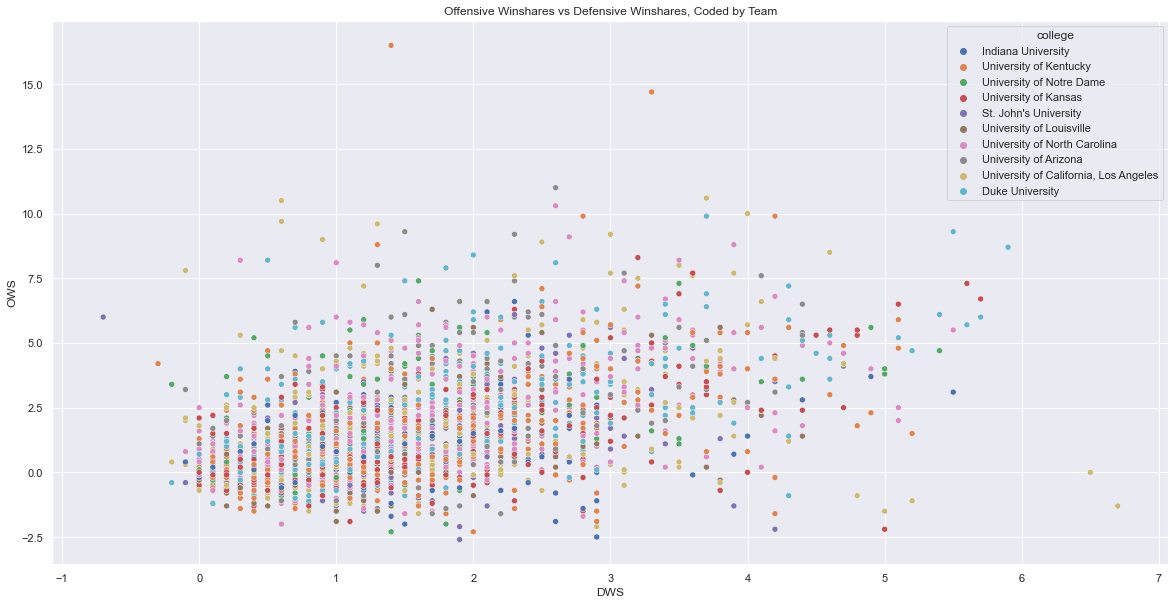

In [160]:
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=onlytopcolleges, x="DWS", y="OWS", hue="college").set(title="Offensive Winshares vs Defensive Winshares, Coded by Team")

We can draw several conclusions from the above graph, Duke and The University of Kansas seem to have the high outliers in terms of players who produce high win shares on the offensive and defensive side of the ball. 

It may also be helpful to check out something called a Category Plot which shows us a break down of a category in a specific statistic. Let's see is there is a difference in which positions succeed in overall Win Shares out of certain colleges. 

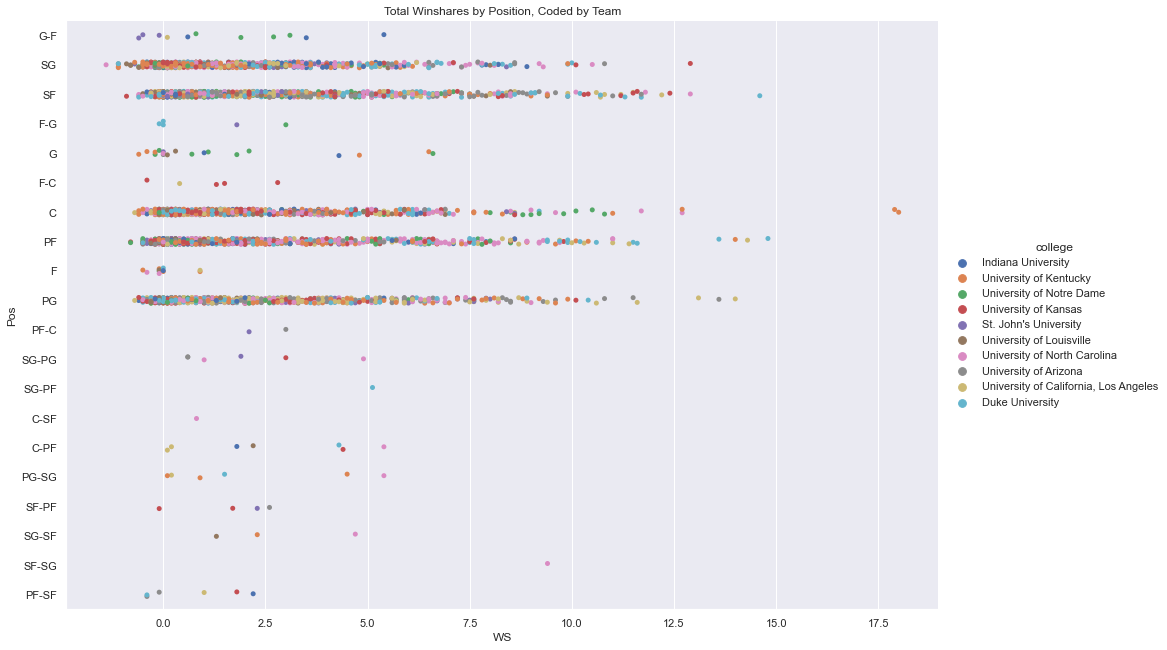

In [161]:
sns.catplot(data=onlytopcolleges, x="WS", y="Pos", hue="college", height=9, aspect=1.5).set(title="Total Winshares by Position, Coded by Team")

We see from the plot that again Duke University has some of the top achievers throughout multiple positions. The University of Kentucky seems to produce very talented players at the Center (C) position as well. The University of North Carolina seems to have many players at the towards the top of multiple positions as well.

To wrap up our visuals here let's mar bar charts for each school based on offensive and defensive win shares.

[Text(0.5, 1.0, 'Top 10 Colleges Ranked on Offensive Winshares')]

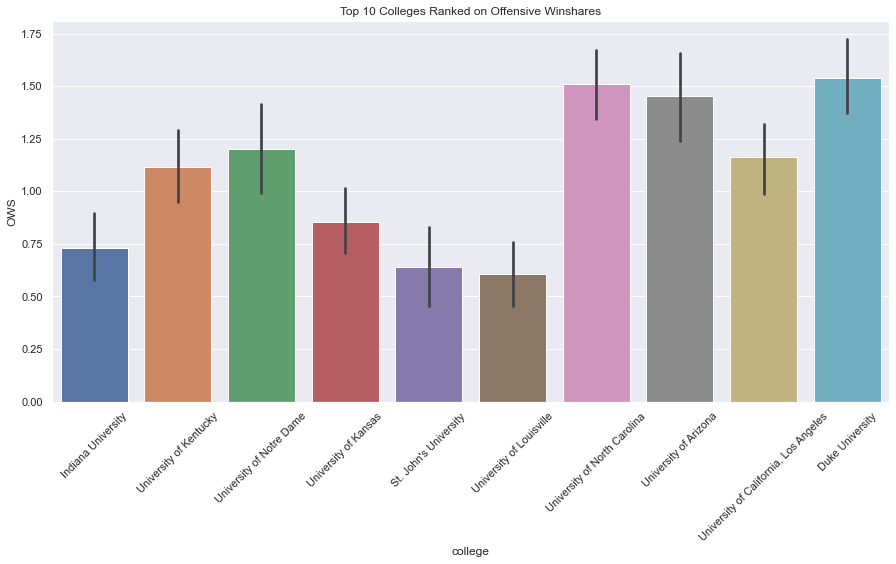

In [162]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xticks(rotation=45)

sns.barplot(data=onlytopcolleges, x="college", y="OWS").set(title="Top 10 Colleges Ranked on Offensive Winshares")

[Text(0.5, 1.0, 'Top 10 Colleges Ranked on Defensive Winshares')]

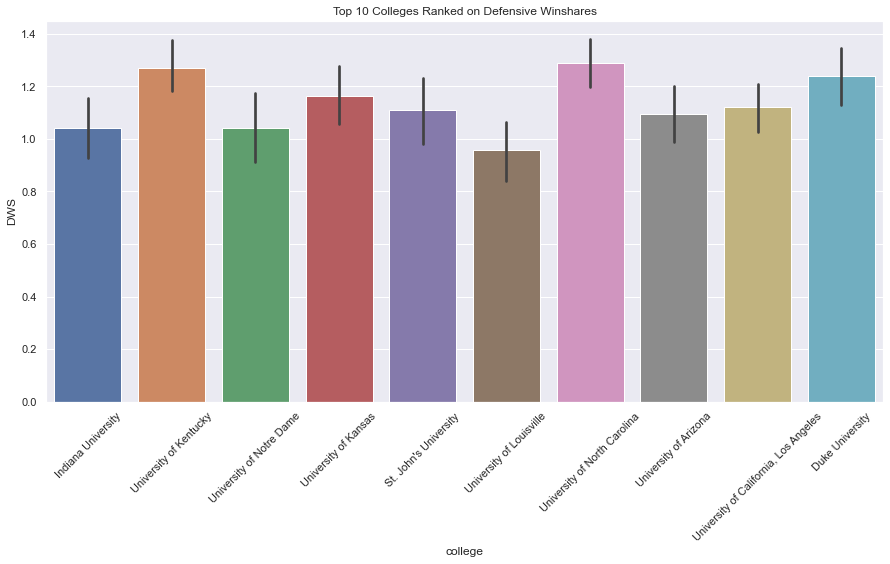

In [163]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xticks(rotation=45)
sns.barplot(data=onlytopcolleges, x="college", y="DWS").set(title="Top 10 Colleges Ranked on Defensive Winshares")

In conclusion, and as much as I hate to admit it as I am not a fan of this school, the data show us that Duke University puts out the most top athletes into the NBA. Duke players are in the top for both offensive and defensive win shares, and they shine acorss multiple positions on the court. The University of Kansas, The University of Kentucky, and The University of North Carolina also had strong statistical showings. 

This tells us that if we were an athlete or the parent of an athlete who wanted to pursue playing in the National Basketball League, a good place to go to learn great fundamentals on defense and offense, and learn to play your role extremely well, would be Duke University. We do have some limitations here as not all NBA players go to college before turning pro. Some play in other countries, the NBA's developmental league, or just go straight from high school. It is important to take into account all different paths before determining what helps someone have the most success as an NBA player.

### Overall Conclusion

In summary, this was a very rich and intriguing data set. I could (and plan to) spend a lot more time diving in and examining other research questions I am curious about. I really enjoyed this project and the class as a whole. Happy Holidays!